# BANK MARKETING PREDICTION

### Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.special import expit


In [2]:
# Reading CSV file
df = pd.read_csv('bank_marketing.csv')
print("Dataset with rows {} and columns {}".format(df.shape[0],df.shape[1]))
df.head()

Dataset with rows 45211 and columns 19


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.head()
df.shape

(45211, 19)

In [4]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
#Finding null values
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

## Univariate Analysis 

In [6]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

The statistical summary of our ‘pdays’ column looks a little bit off . All the percentiles are -1 and mean also seems to be less compare to max values

In [8]:
print(df.pdays.mean())
print(df.pdays.median())
print(df.pdays.min())
print(df.pdays.max())

40.19782796222158
-1.0
-1
871


In [9]:
df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

 -1 is the missing values, so we can consider removing it when describing.

In [10]:
#Describing the pdays column again, this time limiting to the relevant values of pdays.
df["pdays"][df["pdays"]>0].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [11]:
#check
#Now we can see that the mean, median are acceptable value and also as mean is greater than median 
#we can say that it is right skewed and therefore we should standardardize it

In [12]:
# Understanding all columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
targeted
['yes' 'no']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
response
['no' 'yes']


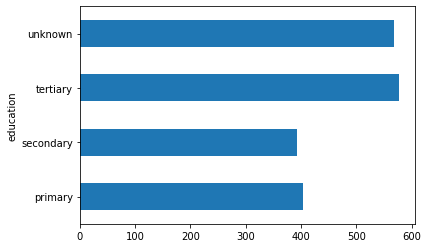

In [13]:
#Plotting a horizontal bar graph with the median values of balance for each education level value. 
df.groupby(['education'])['balance'].median().plot.barh()

Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

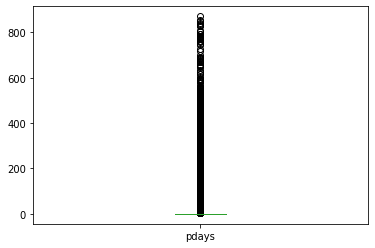

In [14]:
# Box plot for pdays (without considering -1 values)
data = df[df.pdays != -1]
df.pdays.plot.box()
plt.show()

From the above box plot we can see that there are outliers present in pday

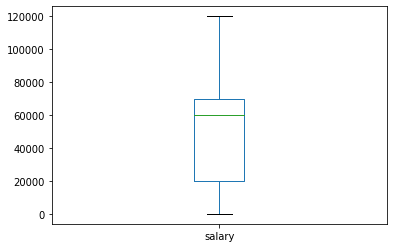

In [15]:
df.salary.plot.box()
plt.show()

#### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.


In [16]:
df1=df.copy()

In [17]:
df1.drop(df1[df1['pdays'] < 0].index, inplace = True) 

In [18]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

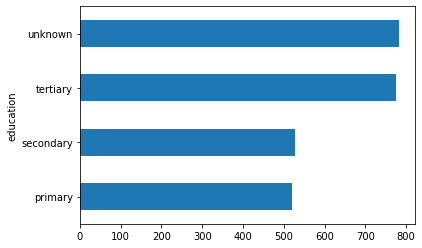

In [19]:
#Plotting a horizontal bar graph with the median values of balance for each education level value. 
df1.groupby(['education'])['balance'].median().plot.barh()

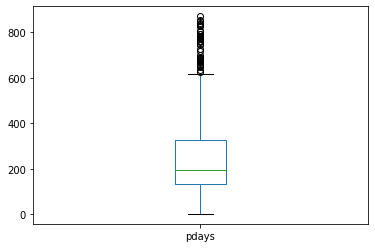

In [20]:
# Box plot for pdays (without considering -1 values)
#data = df[df.pdays != -1]
df1.pdays.plot.box()
plt.show()

 From the above box plot we can see that there are outliers present in pdays.

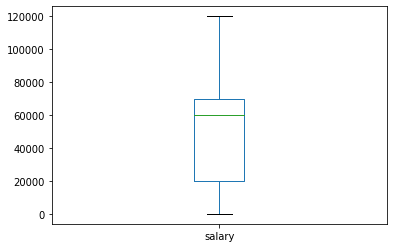

In [21]:
df1.salary.plot.box()
plt.show()

### Bi- variate Analysis

#### Converting the response variable to a convenient form

In [22]:
df1.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [23]:
df1.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [24]:
df1.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

In [25]:
# here we are seperating object and numerical data types 
numeric = []
categorical = []
for col in df.columns:
    if df[col].dtype=='O':
        categorical.append(col)
    else:
        numeric.append(col)

In [26]:
print("Object data type features ",categorical)
print("Numerical data type features ",numeric)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


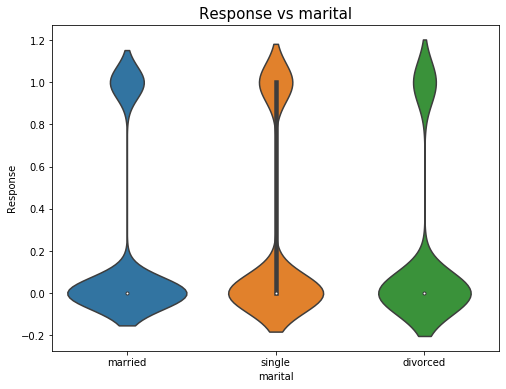

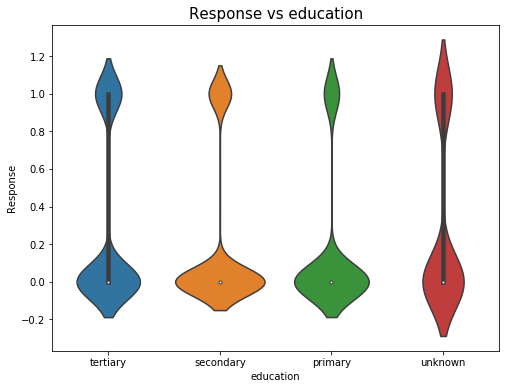

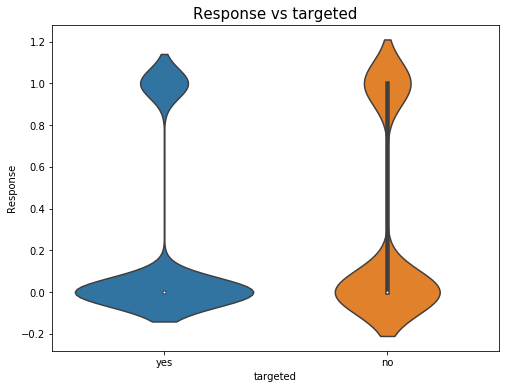

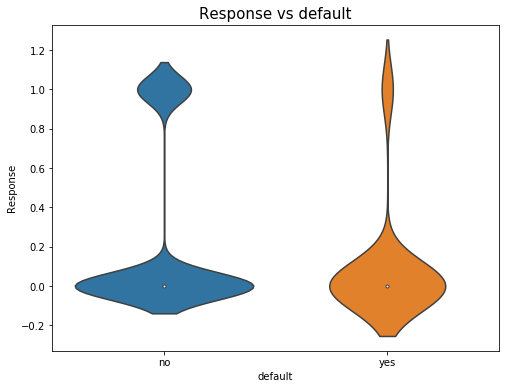

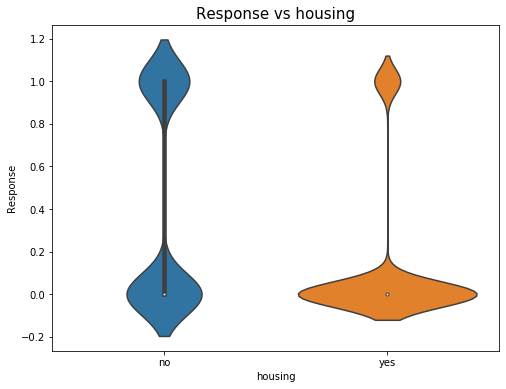

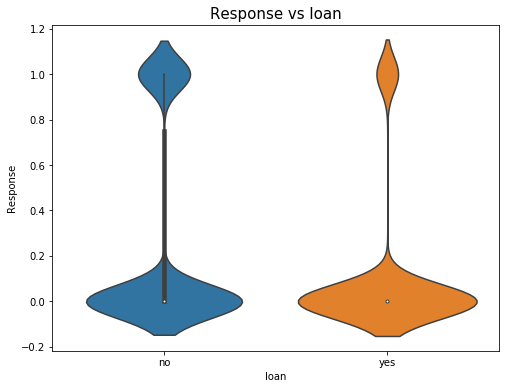

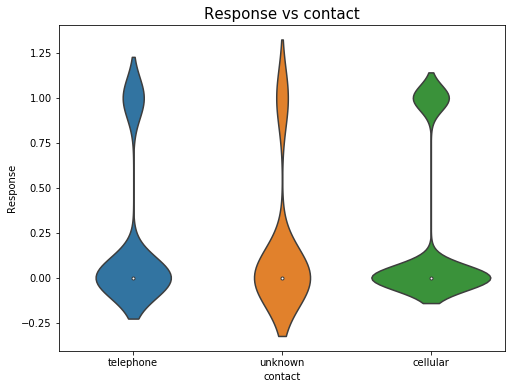

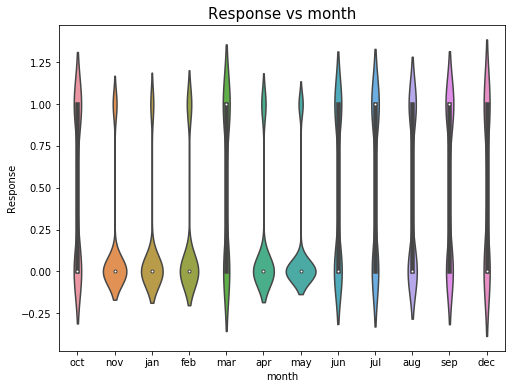

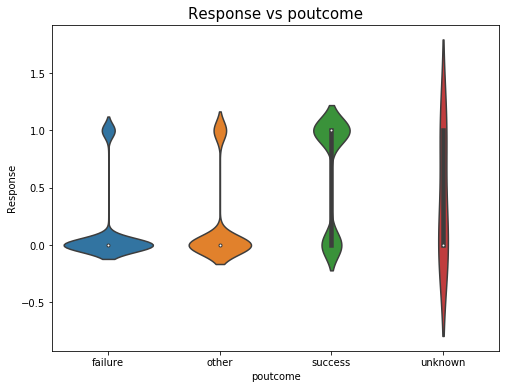

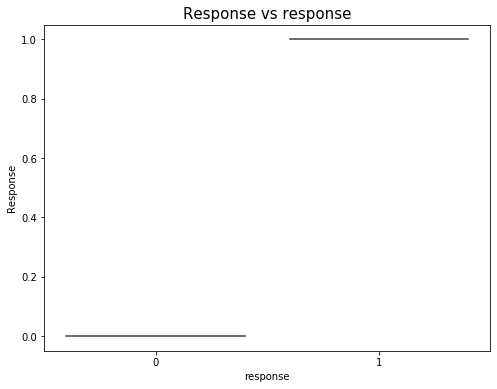

In [27]:
from numpy import median
for col in categorical[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(df1[col],df1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()

In [28]:
### identigyind categorical and numerical columns
#cols = df.columns
#numeric= df._get_numeric_data().columns
#categorical = list(set(cols) - set(numeric))

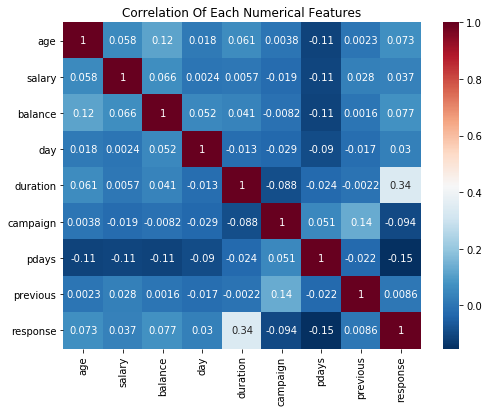

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

#### Visualizing Categorical Features with Response

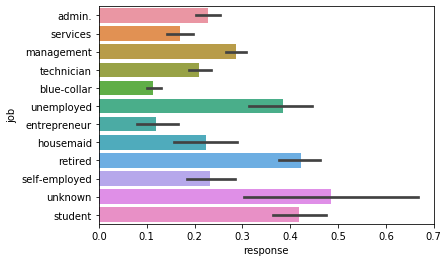

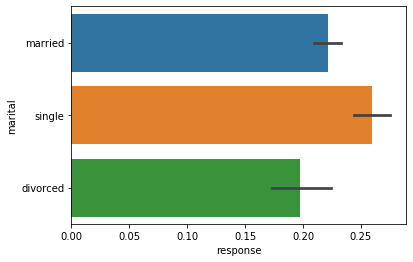

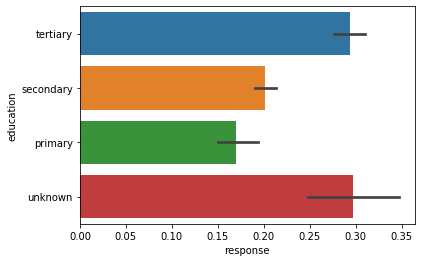

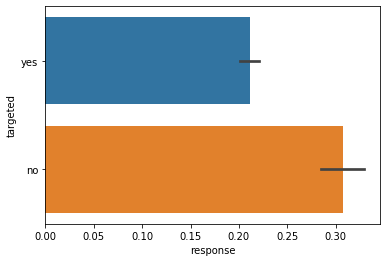

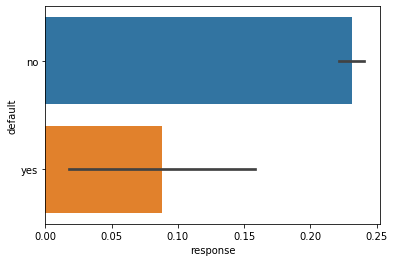

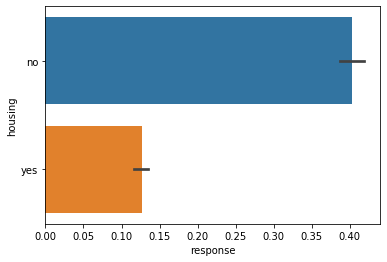

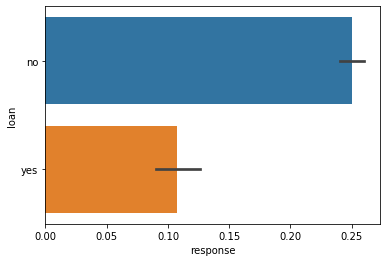

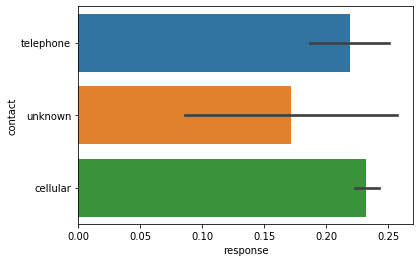

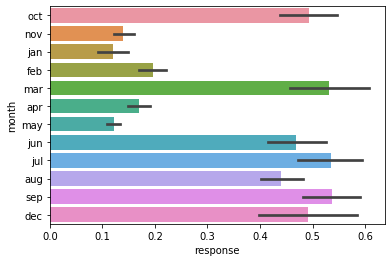

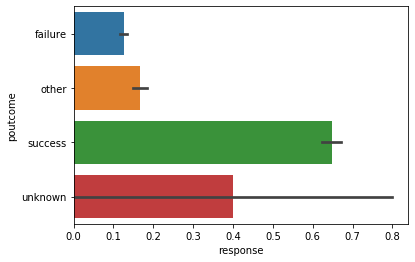

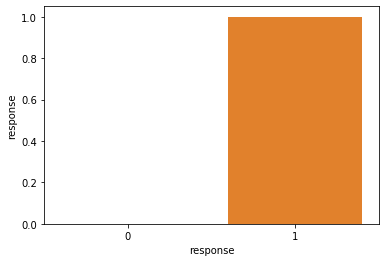

In [30]:
for i in df1[categorical]:
    sns.barplot(df1.response,df1[i])
    plt.show()

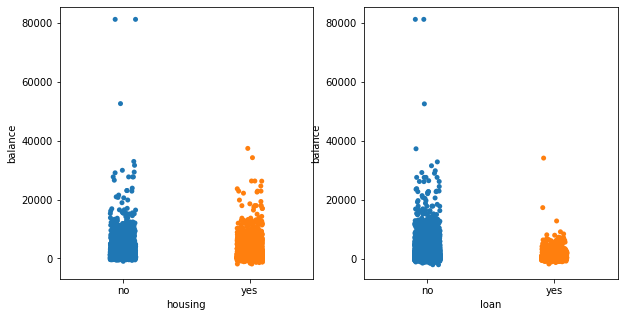

In [31]:
# Analysing balance with housing and loan
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(121)
sns.stripplot(x='housing',y='balance',data=df1)
plt.subplot(122)
sns.stripplot(x='loan',y='balance',data=df1)

With or without housing loans and personal loans will greatly affect the balance, and those without housing loans and personal loans will have more banlance.

#### Marketing analysis

Text(0, 0.5, 'response=no')

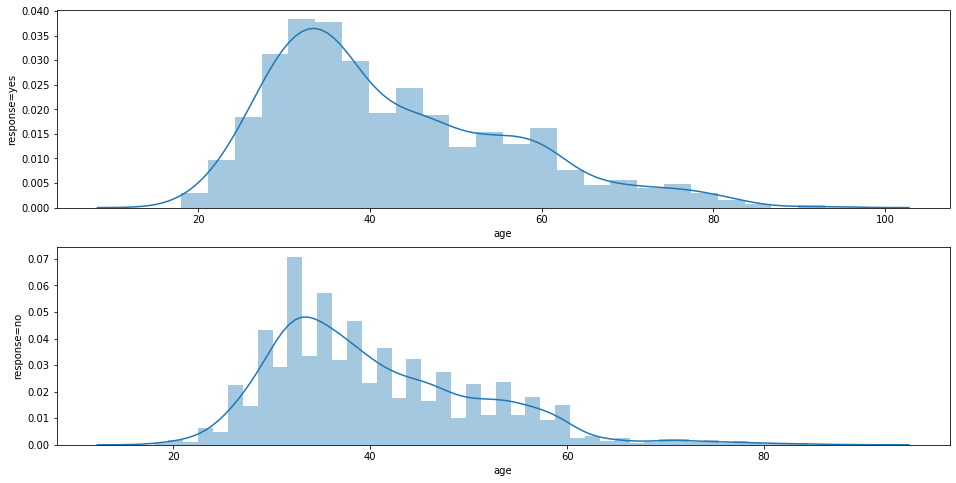

In [32]:
#Response for different user age
plt.figure(figsize=(16,8))
plt.subplot(211)
sns.distplot(df1[df1.response==1].age)
#distplot
plt.ylabel('response=yes')
plt.subplot(212)
sns.distplot(df1[df1.response==0].age)
plt.ylabel('response=no')

##### It can be seen that the main response in business crowd is for 20-60 years old. It can be seen that people after the age of 20 are happy to have deposit, while the younger people under 20 are more likely to have no deposit.

### Label Encoding of Categorical Variables 

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df2 = df1[categorical].apply(LabelEncoder().fit_transform)
df2

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
24060,0,1,2,1,0,0,0,1,10,0,0
24062,0,2,1,1,0,1,1,1,10,1,1
24064,7,1,1,1,0,1,0,1,10,0,1
24072,4,1,2,1,0,1,0,1,10,1,0
24077,4,1,2,1,0,1,0,1,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,0
45201,4,1,2,1,0,0,0,0,9,2,1
45204,5,1,1,1,0,0,0,0,9,0,1
45208,5,1,1,1,0,0,0,0,9,2,1


In [35]:
f_data = df2.join(df1[numeric])

In [36]:
f_data

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,1,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,0,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,1,36,100000,0,23,140,1,143,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,0,34,20000,1475,16,1166,3,530,12
45201,4,1,2,1,0,0,0,0,9,2,1,53,100000,583,17,226,1,184,4
45204,5,1,1,1,0,0,0,0,9,0,1,73,55000,2850,17,300,1,40,8
45208,5,1,1,1,0,0,0,0,9,2,1,72,55000,5715,17,1127,5,184,3


In [37]:
f_data.shape

(8257, 19)

In [38]:
f_data.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,1,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,0,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,1,36,100000,0,23,140,1,143,3


In [39]:
f_data.shape

(8257, 19)

In [40]:
df.shape

(45211, 19)

In [41]:
f_data.columns

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'response', 'age', 'salary', 'balance',
       'day', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

## Predictive model 1: Logistic regression
 

In [42]:
#Predictive model 1: Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)


In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
X = f_data.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [45]:
y= f_data[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7778955336866011

In [50]:
lr.classes_

array([0, 1], dtype=int64)

In [51]:
lr.coef_

array([[ 1.13855541e-02, -4.65904351e-03,  3.64044660e-03,
        -1.00629676e-02, -3.30476670e-04, -2.69447626e-02,
        -7.70513644e-03, -3.68346023e-04, -3.24563048e-02,
         4.91600559e-02, -5.25520722e-03, -2.23910760e-06,
         3.37968503e-05, -3.40139592e-02,  3.08016437e-03,
        -3.14593700e-02, -4.79733704e-03, -1.86708342e-02]])

In [52]:
y_pred =lr.predict(X_test)

In [53]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.75      0.79      0.74      1652

F1 Score: 0.30158730158730157
confusion Matrix:
 [[1224  297]
 [  55   76]]
cross validation: [0.79539952 0.72397094 0.77892187 0.7752877  0.75529982]


In [54]:
confusion_matrix(y_pred,y_test)

array([[1224,  297],
       [  55,   76]], dtype=int64)

In [55]:
f1_score(y_pred,y_test)

0.30158730158730157

In [56]:
# Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(lr,5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [58]:
print(X_train.columns[rfe.support_])

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')


In [59]:
rfe.ranking_

array([ 6,  5,  2,  4,  1,  1,  1,  1,  8,  1,  9, 14, 13, 10, 11,  3, 12,
        7])

In [60]:
cols = X_train.columns[rfe.support_]
cols

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [61]:
import statsmodels.api as sm

In [62]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6599
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2855.1
Date:                Sun, 13 Dec 2020   Deviance:                       5710.2
Time:                        19:45:12   Pearson chi2:                 6.83e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2464      0.062    -19.978      0.000      -1.369      -1.124
default       -0.5875      0.547     -1.073      0.283      -1.660       0.485
housing       -1.1790      0.068    -17.401      0.000      -1.312      -1.046
loan          -0.6706      0.122     -5.512      0.000      -0.909      -0.432
contact       -0.3895      0.106     -3.662      0.000      -0.598      -0.181
poutcome       1.0239      0.040     25.434      0.000       0.945       1.103
==============================================================================
"""

the rfe has selected features but some featues are high value but just build a model

In [63]:
lr.fit(X_train[cols],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
lr.classes_

array([0, 1], dtype=int64)

In [65]:
lr.coef_

array([[-0.45891505, -1.17412716, -0.66319913, -0.38379456,  1.02291517]])

In [66]:
y_pred2 = lr.predict(X_test[cols])

In [67]:
print('Report:\n',classification_report(y_test, y_pred2))
print("F1 Score:",f1_score(y_pred2,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))


Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1279
           1       0.72      0.39      0.50       373

    accuracy                           0.83      1652
   macro avg       0.78      0.67      0.70      1652
weighted avg       0.81      0.83      0.81      1652

F1 Score: 0.5043478260869565
confusion Matrix:
 [[1222  228]
 [  57  145]]
kfold cross validation:
 [0.79539952 0.72397094 0.77892187 0.7752877  0.75529982]


In [68]:
# Some feature has higher p value so lets check with another approach ie.. vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,default,housing,loan,contact,poutcome
40829,1.0,0,1,0,0,2
29715,1.0,0,0,1,0,0
35015,1.0,0,1,0,0,0
41008,1.0,0,0,0,0,2
40646,1.0,0,1,0,1,0


In [70]:
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [71]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     378.4
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:45:14   Log-Likelihood:                -2842.3
No. Observations:                6605   AIC:                             5697.
Df Residuals:                    6599   BIC:                             5737.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2556      0.010     26.881      0.000       0.237       0.274
default       -0.0629      0.056     -1.127      0.260      -0.172       0.047
housing       -0.1904      0.010    -19.192      0.000      -0.210      -0.171
loan          -0.0730      0.014     -5.394      0.000      -0.099      -0.046
contact       -0.0618      0.014     -4.346      0.000      -0.090      -0.034
poutcome       0.1873      0.006     30.507      0.000       0.175       0.199
==============================================================================
Omnibus:                      750.000   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.279
Skew:                           0.954   Prob(JB):                    5.15e-224
Kurtosis:                       3.306   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.79
2,education,6.43
3,targeted,6.43
11,salary,5.38
16,pdays,5.21
1,marital,4.35
13,day,4.10
8,month,3.60
5,housing,3.14
15,campaign,2.87


#### After looking to the various factors such as vif, lets take features manually and build a model

In [73]:
F_cols = ['education', 'job', 'poutcome', 'marital', 'month','targeted', 'housing', 'age', 'salary','day','duration']

In [74]:
log = sm.GLM(y_train,(sm.add_constant(X_train[F_cols])), family = sm.families.Binomial())
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6593
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.4
Date:                Sun, 13 Dec 2020   Deviance:                       5072.8
Time:                        19:45:15   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3311      0.302    -11.047      0.000      -3.922      -2.740
education      0.2181      0.068      3.201      0.001       0.085       0.352
job            0.0252      0.011      2.227      0.026       0.003       0.047
poutcome       1.0535      0.043     24.562      0.000       0.969       1.138
marital        0.1761      0.067      2.625      0.009       0.045       0.308
month          0.0038      0.010      0.373      0.709      -0.016       0.024
targeted      -0.0621      0.113     -0.547      0.584      -0.284       0.160
housing       -1.2152      0.075    -16.098      0.000      -1.363      -1.067
age            0.0046      0.003      1.393      0.164      -0.002       0.011
salary      9.313e-07   1.22e-06      0.765      0.444   -1.45e-06    3.32e-06
day            0.0042      0.004      0.976      0.329      -0.004       0.013
duration       0.0036      0.000     22.906      0.000       0.003       0.004
==============================================================================
"""

In [75]:
lr.fit(X_train[F_cols],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
lr.classes_

array([0, 1], dtype=int64)

In [77]:
lr.coef_

array([[-3.90334709e-04, -2.02446100e-03,  1.07238729e-03,
        -1.05136391e-03, -5.53287441e-03, -1.09195352e-03,
        -1.40899051e-03, -3.43618548e-02, -3.80340872e-06,
        -1.24154243e-02,  2.65349798e-03]])

In [78]:
predf = lr.predict(X_test[F_cols])

In [79]:
def LR_matric():    
    print('Report:\n',classification_report(y_test,predf ))
    print("F1 Score:",f1_score(predf,y_test))
    print('confusion Matrix:\n',confusion_matrix(predf,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
  

In [80]:
LR_matric()

Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.53      0.16      0.24       373

    accuracy                           0.78      1652
   macro avg       0.66      0.56      0.56      1652
weighted avg       0.74      0.78      0.73      1652

F1 Score: 0.24380165289256198
confusion Matrix:
 [[1227  314]
 [  52   59]]
kfold cross validation:
 [0.79539952 0.72397094 0.77892187 0.7752877  0.75529982]


In [81]:
print("Important Features are :", F_cols)

Important Features are : ['education', 'job', 'poutcome', 'marital', 'month', 'targeted', 'housing', 'age', 'salary', 'day', 'duration']


### Predictive model 2: Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5,random_state=42,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [83]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [84]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8392127176381529

In [85]:
y_pred1 = rfc.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [87]:
f1_score(y_test,y_pred1)

0.5728987993138936

In [88]:
confusion_matrix(y_test,y_pred1)

array([[1236,   43],
       [ 206,  167]], dtype=int64)

In [89]:
def RF_matric():    
    print('Report:\n',classification_report(y_test, y_pred1))
    print("F1 Score:",f1_score(y_pred1,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))
 

In [90]:
RF_matric()

Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1279
           1       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652

F1 Score: 0.5728987993138936
confusion Matrix:
 [[1236  206]
 [  43  167]]
cross validation: [0.77905569 0.82082324 0.85584494 0.85584494 0.58570563]


In [91]:
from sklearn.metrics import roc_auc_score

In [92]:
roc_auc_score(y_test,y_pred1)

0.7070505819937242

## RFE

In [93]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='auto',
                                     max_leaf_nodes=50, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [94]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [95]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [96]:
cols = X_train.columns[rfe1.support_]

In [97]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [98]:
y_pred3 = rfc.predict(X_test[cols])

In [99]:
f1_score(y_pred3,y_test)

0.631911532385466

In [100]:
confusion_matrix(y_pred3,y_test)

array([[1219,  173],
       [  60,  200]], dtype=int64)

Housing, month, pdays, poutcome, duration are imp feature from RANDOM FOREST perspective.

Housing, month, pdays, poutcome, duration this are importent factor to calculate y variable both logistic and random forest